<a href="https://colab.research.google.com/github/omkarmohite123/linear-regression/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regresion**

In [60]:
#from google.colab import files
#uploaded=files.upload()

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
dataset = pd.read_csv('student_scores.csv') #read the dataset

In [63]:
print(dataset.shape)
dataset.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [64]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [65]:
dataset.Hours.quantile(0.75)

7.4

In [66]:
iqr = dataset.Hours.quantile(0.75) - dataset.Hours.quantile(0.25)
upper_threshold = dataset.Hours.quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset.Hours.quantile(0.25) - (1.5 * iqr)
upper_threshold

14.450000000000001

values greater than q3 + 1.5iqr -> outlier
values less than q1 - 1.5iqr -> outlier




No skew in the data. 

In [67]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [68]:
dataset = dataset.drop_duplicates()
dataset.shape

(25, 2)

In [69]:
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

Median and mean are closer to each other - there is less skew in the data

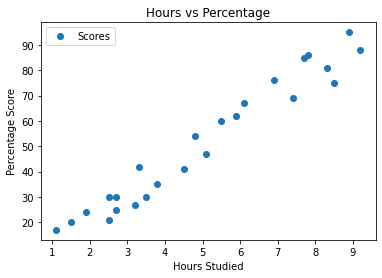

In [70]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

1) Is there any relationship between the feature and target - Yes
2) Is there any linear relationship between the feature and target - Yes
3) No transformation is required

In [71]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


There is a linear relationship between hours and score => we can go ahead and develop a linear regression model. No transformation required.



In [72]:
dataset.Scores.values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

# Preparing the data

In [73]:
a = [1,2,3,4]
a[:-2]

[1, 2]

In [74]:
#dataset.iloc[row_criteria,column_criteria]

In [75]:
X = dataset.loc[:, ['Hours']].values # select all rows and select all columns except the last column as my feature
y = dataset.loc[:, 'Scores'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [76]:
y_test

array([17, 86, 75, 81, 35, 24, 30, 41])

In [77]:
X_train.shape, X_test.shape

((17, 1), (8, 1))

# Normlising/Scaling the data

In [78]:
# from sklearn.preprocessing import StandardScaler # importing the required function
# scaler = StandardScaler() #initialis
# scaler.fit(X_train) # find the values of mu and sigma
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [79]:
# from sklearn.preprocessing import MinMaxScaler
# shivaData = np.array([1.4,2.3,3.3,4,-4]).reshape(-1,1)
# scaler = MinMaxScaler()
# scaler.fit(shivaData)
# scaler.transform(shivaData)

In [80]:
# scaler.var_

In [81]:
X_test

array([[1.1],
       [7.8],
       [8.5],
       [8.3],
       [3.8],
       [1.9],
       [3.5],
       [4.5]])

# Modelling

In [82]:
#Model for algorithm - score = (m * hours) + c

In [83]:
# 

In [84]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [85]:
print(regressor.intercept_) # c

1.8044816796204586


In [86]:
print(regressor.coef_) # slope - m

# predicted score  = 9.91 * (hours) + 1.68

[10.09690118]


In [87]:
regressor.predict([[7.5]])

array([77.53124054])

In [88]:
#regressor.predict(scaler.transform(np.array([4]).reshape(-1,1)))

In [89]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([12.91107298, 80.56031089, 87.62814172, 85.60876148, 40.17270617,
       20.98859392, 37.14363581, 47.24053699])

In [90]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,17,12.911073
1,86,80.560311
2,75,87.628142
3,81,85.608761
4,35,40.172706
5,24,20.988594
6,30,37.143636
7,41,47.240537


In [91]:
regressor.predict([[12]]) # perils of extrapolation

array([122.96729585])

# Metrics

In [92]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test) # another way to get the r^2 values

R2- SCORE: 0.9339022592913205


0.9339022592913205

# Custom Loss Function

In [93]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [94]:
#beta_init -> parameter
#X -> fts
#y -> target
#ypred ->  matmul of beta_init and X = np.matmul(X,beta)
#loss -> mean(abs(y - y_pred)) = np.mean(np.abs(y - np.matmul(X,beta)))

In [95]:
#Gradient descent to find the params that minimze the loss function

from scipy.optimize import minimize
import numpy as np
#minimize - given a function, it will try to find the params that makes the function the lowest value


# np.matmul(X,np.square(beta)) = prediceted = x * beta
# mae = mean(abs(predicted - trueVal))
# np.square(beta)

# we will write our own loss function
# my model is ypred = m^2 * x + c^2
# my loss function is MSE loss funcition =>
# my loss function is np.mean((Y - np.matmul(X,np.square(beta))))
#beta stores the values of the parameters : beta[0]  will be m and beta[1] will be c
# ypred = (np.square(beta[0]) * X) + (np.square(beta[1]) * 1)
#mse = np.mean(np.square(ypred - y))

#I am trying to find the value of m (beta) that minimises my below loss function
def objective_function(beta, X, Y): #Loss Function
    #X = np.c_[X,np.ones(X.shape[0])]
    error = np.mean(np.square(((np.square(beta[0]) * X) + (np.square(beta[1]) * 1)) - Y)) 
    return(error)

# You must provide a starting point at which to initialize
# the parameter search space
beta_init = np.array([2,5]) # initiate the model with a random value

#code for doing gradient descent
result = minimize(objective_function, beta_init, args=(X_train,y_train),
                  method='BFGS', options={'maxiter': 500}) #syntax for doing gradient descent

# result
# The optimal values for the input parameters are stored
# in result.x
beta_hat = result.x # score = 9.75 * hoursStudies
print(beta_hat)

[4.99592068e-03 7.26797235e+00]


In [96]:
from scipy.optimize import minimize
# y = mx + c 
def objective_function(beta, X, Y):
    b = np.ones((X.shape[0],X.shape[1]+1))
    b[:,:-1] = X
    error = np.mean(np.abs(np.matmul(b,beta) - Y))
    return(error)

# You must provide a starting point at which to initialize
# the parameter search space
beta_init = np.array([1,1])
result = minimize(objective_function, beta_init, args=(X_train,y_train),
                  method='BFGS', options={'maxiter': 500})

# The optimal values for the input parameters are stored
# in result.x
beta_hat = result.x
print(beta_hat)

[10.3557339   2.83396827]


# **Effect of Outlier**

In [97]:
#X_train_outlier = np.vstack([X_train,scaler.transform([[24]])])
#y_train_outlier = np.append(y_train,100)

#plt.scatter(X_train_outlier, y_train_outlier)



regressor = LinearRegression()
#regressor.fit(X_train_outlier, y_train_outlier)
#y_pred = regressor.predict(X_test) 
print(y_pred)
print(y_test)
#print(regressor.coef_[0],regressor.intercept_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 :', np.sqrt(metrics.r2_score(y_test, y_pred)))

[12.91107298 80.56031089 87.62814172 85.60876148 40.17270617 20.98859392
 37.14363581 47.24053699]
[17 86 75 81 35 24 30 41]
Mean Absolute Error: 6.0417255475926135
Mean Squared Error: 44.10268471066783
R2 : 0.9663861853789718


# **Multiple Linear Regression**

In [98]:
import pandas as pd
dataset = pd.read_csv('petrol_consumption.csv')

In [99]:
dataset.head()
#dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [100]:
dataset.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [101]:
dataset.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

In [102]:
dataset = dataset.drop_duplicates()

In [103]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [104]:
iqr = dataset.Paved_Highways.quantile(0.75) - dataset.Paved_Highways.quantile(0.25)
upper_threshold = dataset.Paved_Highways.quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset.Paved_Highways.quantile(0.25) - (1.5 * iqr)
upper_threshold

13224.625

In [105]:
dataset.Paved_Highways = dataset.Paved_Highways.clip(-2958, 13224)

In [106]:
dataset.shape

(48, 5)

# **EDA**

In [107]:
dataset.groupby('Petrol_tax')['Petrol_Consumption'].mean()

Petrol_tax
5.00     640.000000
6.00     782.000000
6.58     644.000000
7.00     631.736842
7.50     536.000000
8.00     502.000000
8.50     582.666667
9.00     530.875000
10.00    457.000000
Name: Petrol_Consumption, dtype: float64

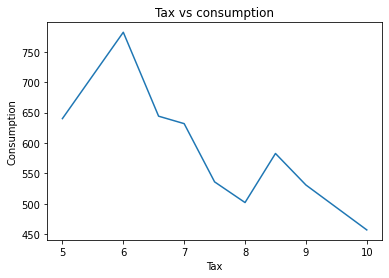

In [108]:
dataset.groupby('Petrol_tax')['Petrol_Consumption'].mean().plot()
import matplotlib.pyplot as plt
#dataset.plot(x='Petrol_tax', y='Petrol_Consumption', style='o')
plt.title('Tax vs consumption')
plt.xlabel('Tax')
plt.ylabel('Consumption')
plt.show()

In [109]:
dataset[['Petrol_tax','Petrol_Consumption']].corr()

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.00000,-0.45128
Petrol_Consumption,-0.45128,1.00000


1) There is a linear relationship between tax and consumption
2) As tax increases, comsumption decreases which is in-line with our GK
3) No transformation required


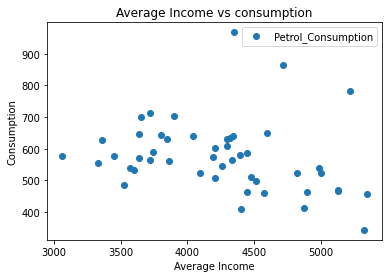

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


In [110]:
dataset.plot(x='Average_income', y='Petrol_Consumption', style='o')
plt.title('Average Income vs consumption')
plt.xlabel('Average Income')
plt.ylabel('Consumption')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
dataset[['Average_income','Petrol_Consumption']].corr()

1) There is a low linear relationshp between the data 
2) No transformation reqd
3) The direction of relatiohsnip is not in-line with our GK

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


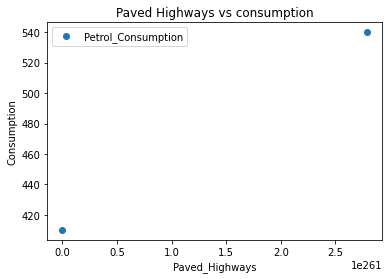

,transformed,Petrol_Consumption
transformed,NaN,0.0
Petrol_Consumption,0.0,1.0


In [111]:
import numpy as np
dataset['transformed'] = np.exp(dataset['Paved_Highways']) # transformation of x to log(x)
dataset.plot(x='transformed', y='Petrol_Consumption', style='o')
plt.title('Paved Highways vs consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('Consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()

1) There is no linear relationship between highways and consumption
2) Have tried all trasnformations - still not able to see a good linear relationship
3) Have decided to drop the feature

In [112]:
#dataset['logPaved_Highways']  = np.log(dataset['Paved_Highways'])

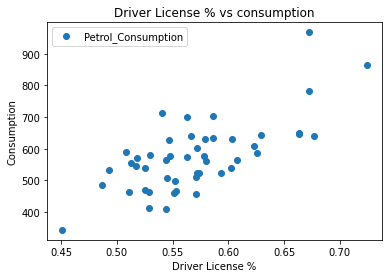

,Population_Driver_licence(%),Petrol_Consumption
Population_Driver_licence(%),1.000000,0.698965
Petrol_Consumption,0.698965,1.000000


In [113]:

dataset.plot(x='Population_Driver_licence(%)', y='Petrol_Consumption', style='o')
plt.title('Driver License % vs consumption')
plt.xlabel('Driver License %')
plt.ylabel('Consumption')
plt.show()
dataset[['Population_Driver_licence(%)','Petrol_Consumption']].corr()

1) High correlation between the data 
2) No transformation reqd

In [114]:
X = dataset[['Petrol_tax', 'Average_income', 'Population_Driver_licence(%)']].values #array of features
y = dataset['Petrol_Consumption'].values #array of targets

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [116]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

# Model training

In [117]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [118]:
coeff_df = pd.DataFrame(regressor.coef_,['Petrol_tax', 'Average_income',
       'Population_Driver_licence(%)'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df
# petrol_consumption = -30.7 *scaled_petrol_tax + -39.53 * scaled_avg_income +  82.41 * scaled_pop_driver + 582

,Coefficient
Petrol_tax,-28.500404
Average_income,-40.446109
Population_Driver_licence(%),45.748548


In [119]:
regressor.predict(scaler.transform(np.array([[8,5000,0.6]])))

array([544.06774439])

In [120]:
regressor.intercept_ # c 

567.4473684210529

In [121]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,865,719.715409
1,471,472.233300
2,498,556.521318
3,610,644.578858
4,525,558.170751
5,410,527.781894
6,648,688.936141
7,487,529.075789
8,640,654.701405
9,968,691.698556


In [122]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.5833423961595894


# Feature Selection

# RFE

In [123]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Petrol_tax', 'Average_income', 'LogPaved_Highways',
       'Population_Driver_licence(%)'],selector.support_))

[('Petrol_tax', True), ('Average_income', True), ('LogPaved_Highways', True)]

# Sequential Feature selection

In [124]:
!pip install scikit-learn==0.24.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.3 MB 47.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


In [125]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['Petrol_tax', 'Average_income', 'LogPaved_Highways',
       'Population_Driver_licence(%)'],sfs.get_support())))

[('Petrol_tax', True), ('Average_income', True), ('LogPaved_Highways', False)]


In [126]:
list(zip([1,2,3],['a','b','c']))

[(1, 'a'), (2, 'b'), (3, 'c')]

In [127]:
X_trans = sfs.transform(X)
X_trans # feature selection

array([[9.000e+00, 3.571e+03],
       [9.000e+00, 4.092e+03],
       [9.000e+00, 3.865e+03],
       [7.500e+00, 4.870e+03],
       [8.000e+00, 4.399e+03],
       [1.000e+01, 5.342e+03],
       [8.000e+00, 5.319e+03],
       [8.000e+00, 5.126e+03],
       [8.000e+00, 4.447e+03],
       [7.000e+00, 4.512e+03],
       [8.000e+00, 4.391e+03],
       [7.500e+00, 5.126e+03],
       [7.000e+00, 4.817e+03],
       [7.000e+00, 4.207e+03],
       [7.000e+00, 4.332e+03],
       [7.000e+00, 4.318e+03],
       [7.000e+00, 4.206e+03],
       [7.000e+00, 3.718e+03],
       [7.000e+00, 4.716e+03],
       [8.500e+00, 4.341e+03],
       [7.000e+00, 4.593e+03],
       [8.000e+00, 4.983e+03],
       [9.000e+00, 4.897e+03],
       [9.000e+00, 4.258e+03],
       [8.500e+00, 4.574e+03],
       [9.000e+00, 3.721e+03],
       [8.000e+00, 3.448e+03],
       [7.500e+00, 3.846e+03],
       [8.000e+00, 4.188e+03],
       [9.000e+00, 3.601e+03],
       [7.000e+00, 3.640e+03],
       [7.000e+00, 3.333e+03],
       [

# Cross Validation

In [128]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True) #untrained model

In [129]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
cv_results['test_score'].mean()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

-0.08393233997817687

# **Ridge Regression**

In [130]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso, Ridge
for alpha in [0.001,0.002,0.003,0.005,0.01,0.02,0.03,0.04,0.1,0.2,0.5,1]:
  regressor = Ridge(normalize=True,alpha = alpha)
  cv_results = cross_validate(regressor, X, y, cv=5, scoring = "r2" , return_train_score=True)
  print("Alpha : ", alpha, cv_results['test_score'].mean(), cv_results['train_score'].mean())



Alpha :  0.001 0.1961556494186256 0.6755391938604969
Alpha :  0.002 0.19672781277288742 0.6755371017526013
Alpha :  0.003 0.19729403627144318 0.6755336270523904
Alpha :  0.005 0.1984088253713139 0.6755225691938654
Alpha :  0.01 0.20109464586356846 0.675471409231476
Alpha :  0.02 0.20604904815246666 0.6752722727257768
Alpha :  0.03 0.21047737364987582 0.6749514245907917
Alpha :  0.04 0.21441350342333898 0.6745171446383447
Alpha :  0.1 0.22929963836350026 0.6699231826461277
Alpha :  0.2 0.23040663440656178 0.6570467605613275
Alpha :  0.5 0.15542740592698706 0.6037563148724299
Alpha :  1 -0.019946429607983384 0.5159129503885382
